Metoda prophet na prognozowanie 
https://pypi.org/project/prophet/  tutaj znajduje się fajny opis kiedy najlepiej skorzystać z tej metody prognozowania


In [1]:
import pandas as pd
import numpy as np
import fbprophet 
import matplotlib.pyplot as plt

# https://mode.com/example-gallery/forecasting_prophet_python_cookbook/
data_path = "E:/page ds/pages/ts_covid19/covid19_dane.csv" 
Covid19 = pd.read_csv(data_path)
display(Covid19)


,Data,Nowe.przypadki,Zgony
0,2020-03-03,0,0
1,2020-03-04,1,0
2,2020-03-05,0,0
3,2020-03-06,4,0
4,2020-03-07,1,0
...,...,...,...
871,2022-07-22,2544,3038
872,2022-07-23,2942,3493
873,2022-07-24,562,642
874,2022-07-25,523,589


Dokonuję analogicznych ograniczeń do modelu jak dla sieci LSTM 
jednocześnie pozostawiam 14 dniowy okres testowy

In [2]:
df = Covid19[['Data','Nowe.przypadki']]
df = df[df['Data'] > '2020-07-30']


In [5]:
print('Rozmiar zbioru danych:' , df.shape)


Rozmiar zbioru danych: (726, 2)


In [4]:
# zapewniam odpowiedni typ danych dla kolumny z datą, zapewni nam to możliwość postanowienia na tej kolumnie 
pom = pd.options.mode.chained_assignment 
pd.options.mode.chained_assignment = None
df['Data'] = pd.to_datetime(df['Data']).copy()
pd.options.mode.chained_assignment = pom
df.dtypes

Data              datetime64[ns]
Nowe.przypadki             int64
dtype: object

In [6]:
# teraz kopiuję obecne kolumny przez co na Dacie mogę postawić indeks. Dzięki takiej akcji pakiet Pandas zacznie interpretować 
# zbiór danych jako szereg czasowych
df['ds'] = df['Data']
df['y'] = df['Nowe.przypadki']
df.set_index('Data')
df = df[df['Data'] > '2020-07-30']

df_Train = df[df['Data'] <= '2022-07-12']
df_Test = df[df['Data'] > '2022-07-12']
df_Train.set_index('Data')

print('Rozmiar zbioru danych:' ,df_Train.shape)
print('Rozmiar zbioru danych:' ,df_Test.shape)


Rozmiar zbioru danych: (712, 4)
Rozmiar zbioru danych: (14, 4)


(array([18475., 18506., 18536., 18567., 18597., 18628., 18659., 18687.,
        18718., 18748., 18779., 18809., 18840., 18871., 18901., 18932.,
        18962., 18993., 19024., 19052., 19083., 19113., 19144., 19174.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

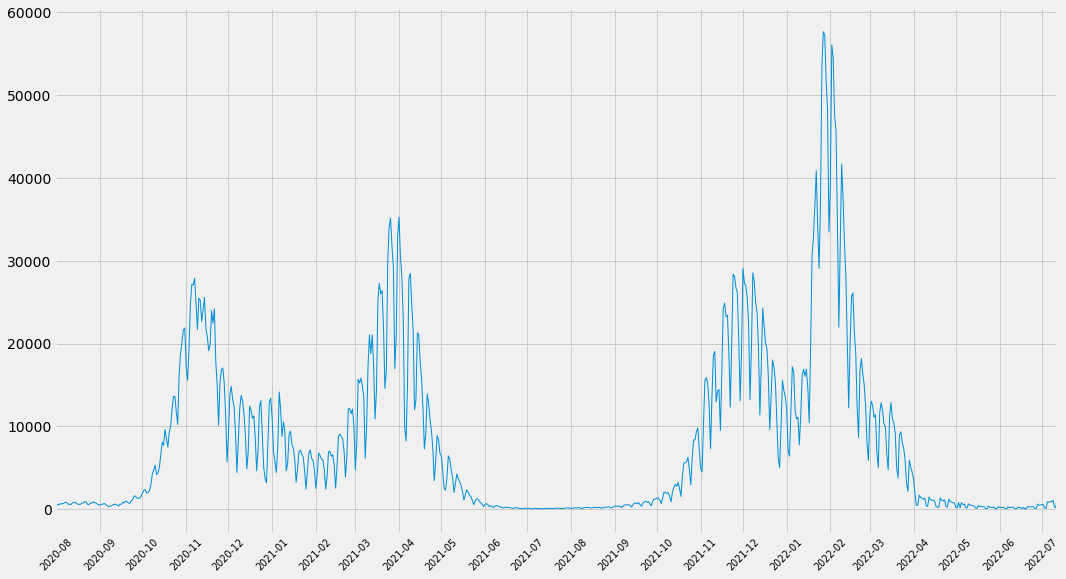

In [7]:
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
import matplotlib.dates as mdates

plt.style.use('fivethirtyeight')

plt.figure(figsize=(16, 9))
plt.plot("Data", "Nowe.przypadki",data = df_Train, linewidth = 1)

# round to nearest years.
datemin = np.min(df_Train["Data"])
datemax = np.max(df_Train["Data"])
plt.xlim(datemin, datemax)

# show every 12th tick on x axes
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.xticks(rotation=45, fontweight='light',  fontsize='x-small')


In [8]:
# w odróznieniu od LSTM model prophet jest czuły na wahania w czasie dlatego dobrze unormować wariancję. W tym celu wykorzystam standardowe 
# przekształcenie Boxa Coxa. Analogicznie jak dla modelu ARIMA wykorzystam automatyczny dobór optymalnego parametru Lambda, tutaj dobrana 
# w ten sposób aby minimalizowała fuhnkcję log-likelihood

from scipy.stats import boxcox
pom = pd.options.mode.chained_assignment 
pd.options.mode.chained_assignment = None

# Apply Box-Cox Transform to value column and assign to new column y
df_Train['y'], lam = boxcox(df_Train['Nowe.przypadki'])
pd.options.mode.chained_assignment = pom
print('Transformacja z parametrem Lambda =', lam)

Transformacja z parametrem Lambda = 0.11954459819509883


C:\Users\krzys\AppData\Local\Temp/ipykernel_22108/3634763329.py:5: RuntimeWarning: Second argument 'y' is ambiguous: could be a format string but is in 'data'; using as data.  If it was intended as data, set the format string to an empty string to suppress this warning.  If it was intended as a format string, explicitly pass the x-values as well.  Alternatively, rename the entry in 'data'.
  plt.plot("Data", "y",data = df_Train, linewidth = 1)


(array([18475., 18506., 18536., 18567., 18597., 18628., 18659., 18687.,
        18718., 18748., 18779., 18809., 18840., 18871., 18901., 18932.,
        18962., 18993., 19024., 19052., 19083., 19113., 19144., 19174.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

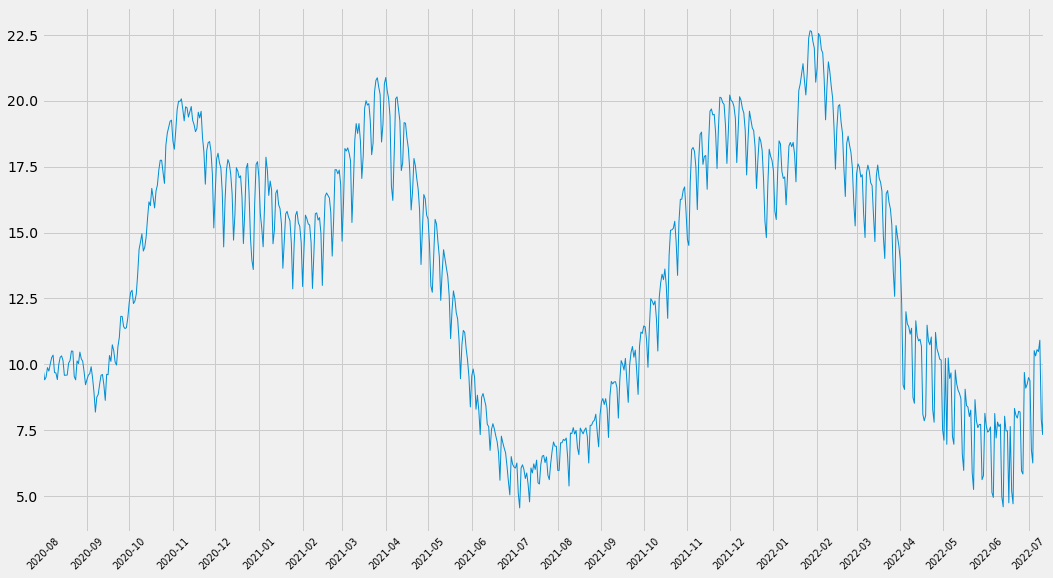

In [9]:
# wykres szeregu z unormowaną wariancją
plt.style.use('fivethirtyeight')

plt.figure(figsize=(16, 9))
plt.plot("Data", "y",data = df_Train, linewidth = 1)

# round to nearest years.
datemin = np.min(df_Train["Data"])
datemax = np.max(df_Train["Data"])
plt.xlim(datemin, datemax)

# show every 12th tick on x axes
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.xticks(rotation=45, fontweight='light',  fontsize='x-small')

In [10]:
# teraz tworzymy instację modelu prophet, wymuszamy aby wykrywał sezonowość roczną oraz dzienną
m = fbprophet.Prophet(yearly_seasonality=True, daily_seasonality=True)
# Następnie dopasowujemy model dla zainicjowanej instancji do danych treningowych
m.fit(df_Train)
# I model gotowy, możemy go wykorzystać do zaprognozowania przyszłości. Wykorzystamy do tego wbudowaną funcję, której zadaniem jest stworzenie 
# zbioru danych zawierającego jedynie daty dla których chcemy wykonać prognozę definiując np. liczbę przyszłych okresów do zaprognozowania
future = m.make_future_dataframe(periods=14)
# i wykonujemy prognozę na przyszłych datach dla zdefiniowanego zakresu dat. 
forecast = m.predict(future)
# Funkcja predict w wyniku zwraca jednocześnie dane ze zbioru treningowego oraz dość bogaty zakres informacji takihc jak przedziały ufności predykcji


E:\Python\Anaconda\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
E:\Python\Anaconda\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
E:\Python\Anaconda\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


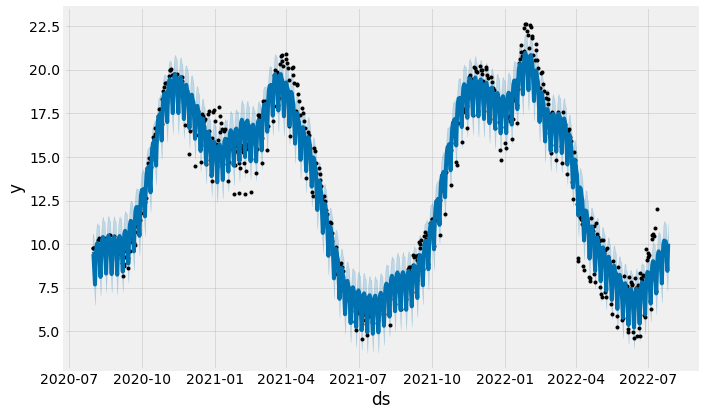

In [11]:
m.plot(forecast)
plt.savefig(r'E:\page ds\pages\ts_covid19\1_prophet_predict_full.png' , format="png", dpi=300)


E:\Python\Anaconda\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
E:\Python\Anaconda\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
E:\Python\Anaconda\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


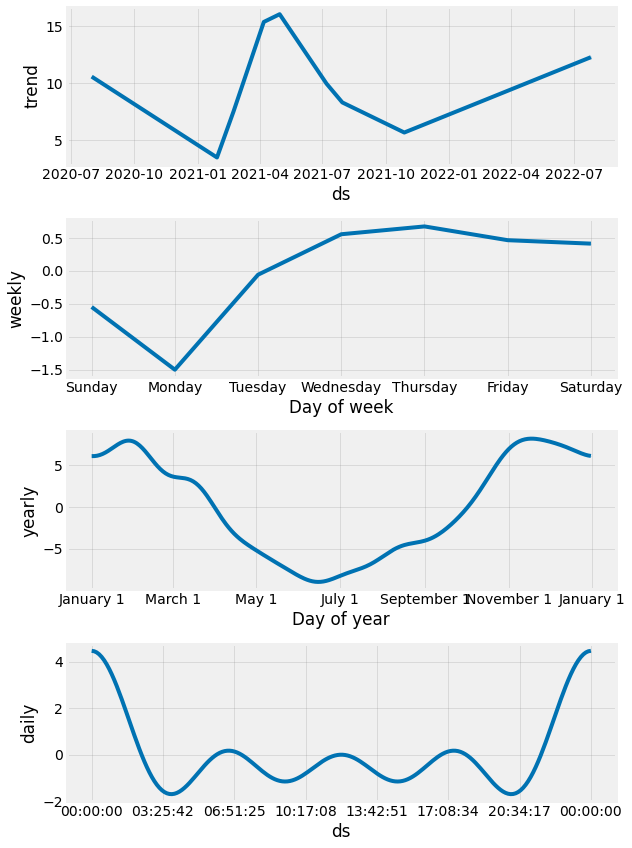

In [12]:
m.plot_components(forecast)
plt.savefig(r'E:\page ds\pages\ts_covid19\2_prophet_components.png' , format="png", dpi=300)


In [13]:
# Aby skorzystać z tej prognozy musimu odwrócić transformację Boxa Coxa
from scipy.special import inv_boxcox

In [14]:
forecast[['yhat','yhat_upper','yhat_lower']] = forecast[['yhat','yhat_upper','yhat_lower']].apply(lambda x: inv_boxcox(x, lam))

In [15]:
forecast[forecast['ds'] > '2022-07-01']

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
701,2022-07-02,11.679710,183.438914,572.150912,11.679710,11.679710,-3.352327,-3.352327,-3.352327,4.458433,...,0.413407,0.413407,0.413407,-8.224167,-8.224167,-8.224167,0.0,0.0,0.0,323.552594
702,2022-07-03,11.704002,111.865241,365.725357,11.704002,11.704002,-4.249583,-4.249583,-4.249583,4.458433,...,-0.549180,-0.549180,-0.549180,-8.158836,-8.158836,-8.158836,0.0,0.0,0.0,206.446207
703,2022-07-04,11.728295,71.174187,236.779179,11.728295,11.728295,-5.138664,-5.138664,-5.138664,4.458433,...,-1.502489,-1.502489,-1.502489,-8.094608,-8.094608,-8.094608,0.0,0.0,0.0,128.995891
704,2022-07-05,11.752587,164.803726,488.986613,11.752587,11.752587,-3.631964,-3.631964,-3.631964,4.458433,...,-0.058683,-0.058683,-0.058683,-8.031714,-8.031714,-8.031714,0.0,0.0,0.0,291.517787
705,2022-07-06,11.776879,229.163729,673.656088,11.776879,11.776879,-2.955714,-2.955714,-2.955714,4.458433,...,0.556139,0.556139,0.556139,-7.970286,-7.970286,-7.970286,0.0,0.0,0.0,412.906504
706,2022-07-07,11.801171,267.545867,771.091047,11.801171,11.801171,-2.776899,-2.776899,-2.776899,4.458433,...,0.675025,0.675025,0.675025,-7.910357,-7.910357,-7.910357,0.0,0.0,0.0,455.547584
707,2022-07-08,11.825464,250.531711,711.394297,11.825464,11.825464,-2.927652,-2.927652,-2.927652,4.458433,...,0.465780,0.465780,0.465780,-7.851864,-7.851864,-7.851864,0.0,0.0,0.0,428.565832
708,2022-07-09,11.849756,240.582495,705.677961,11.849756,11.849756,-2.922812,-2.922812,-2.922812,4.458433,...,0.413407,0.413407,0.413407,-7.794652,-7.794652,-7.794652,0.0,0.0,0.0,434.653468
709,2022-07-10,11.874048,160.083705,489.192341,11.874048,11.874048,-3.829224,-3.829224,-3.829224,4.458433,...,-0.549180,-0.549180,-0.549180,-7.738476,-7.738476,-7.738476,0.0,0.0,0.0,280.493633
710,2022-07-11,11.898340,92.601449,317.807077,11.898340,11.898340,-4.727073,-4.727073,-4.727073,4.458433,...,-1.502489,-1.502489,-1.502489,-7.683018,-7.683018,-7.683018,0.0,0.0,0.0,177.497691


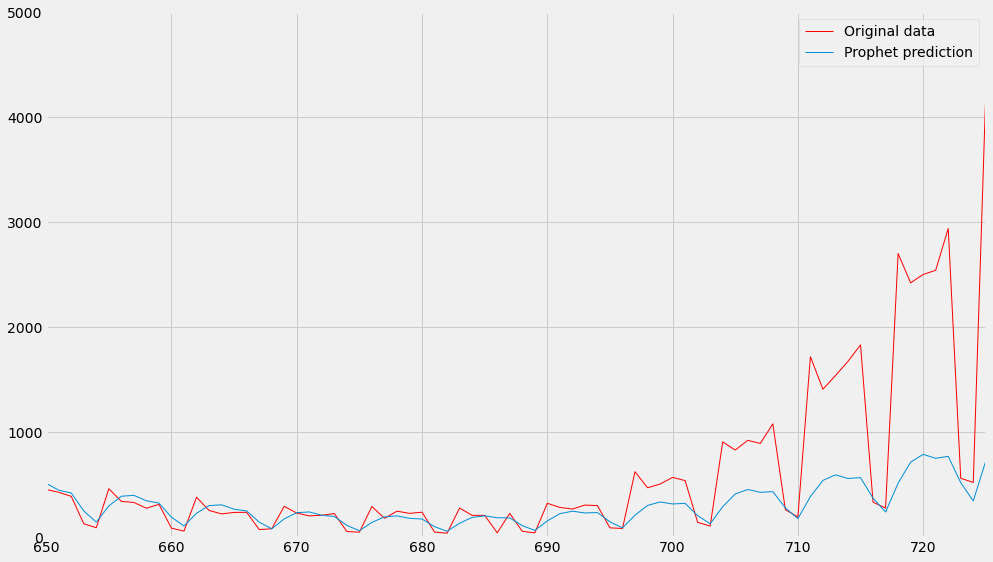

In [86]:
# Wrzucam prognozy na wykres razem z danymi testowymi
import pandas as pd

#df_numeric = {'okres': df.index, 'y': df['y'].tolist()}
#df_numeric = pd.DataFrame(df_numeric)

#trainPredictPlot = np.empty_like(df_numeric)
#trainPredictPlot[:, :] = np.nan
#trainPredictPlot[0:len( forecast[forecast['ds'] <= '2022-07-12']), :] = forecast[forecast['ds'] <= '2022-07-12'][['yhat']]

# shift test predictions for plotting
#testPredictPlot = np.empty_like(df[['ds','y']])
#testPredictPlot[:, :] = np.nan
#testPredictPlot[len( forecast[forecast['ds'] <= '2022-07-12']):len(df), :] = forecast[forecast['ds'] > '2022-07-12'][['ds', 'yhat']]

# plot baseline and predictions
plt.figure(figsize = (15,9))
plt.plot(df['y'].tolist(), c= 'r', linewidth=1)
plt.plot( forecast['yhat'], linewidth=1)
#plt.plot(testPredictPlot, linewidth=1)

plt.xlim(650,len(df)-1)
plt.ylim(0,5000)
plt.legend(["Original data", "Prophet prediction"], loc=0, frameon=True)
plt.savefig(r'E:\page ds\pages\ts_covid19\3_prophet_predict_lastM.png' , format="png", dpi=300)
plt.show()